# Chi Squared Test
Does household income affect travel frequency?

In [1]:
import pandas as pd
from scipy.stats import chi2_contingency
df = pd.read_csv('coded.csv')

# Create a contingency table
contingency_table = pd.crosstab(df['Household Income'], df['How often do you travel by plane?'])

print(contingency_table)
# Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Output the results
print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")

How often do you travel by plane?  0.0  1.0  2.0  4.0  5.0
Household Income                                          
0.0                                 37   55    5    0    1
1.0                                 34  105   18    0    1
2.0                                 36  191   62    1    0
3.0                                 12  103   36    0    0
4.0                                  9   52   41    1    0
Chi-Square Statistic: 94.1393193866575
P-value: 4.2933924080441603e-13


-> We reject the Null Hypothesis that income and frequency are independent of each other.

Problems:
- Missing data
- No Causation
- No info about quality of fit

# Spearman Correlation

In [43]:
import pandas as pd
from scipy.stats import spearmanr
df = pd.read_csv('coded.csv')
df = df.dropna()
#spearman_corr, p_value = spearmanr(df['Household Income'], df['How often do you travel by plane?'])
spearman_corr, p_value = spearmanr(df['How often do you travel by plane?'], df['Is itrude to recline your seat on a plane?'])


print(f"Spearman Correlation Coefficient: {spearman_corr}")
print(f"P-value: {p_value}")


Spearman Correlation Coefficient: 0.11430283282642159
P-value: 0.005481816771987685


-> Negative correlation makes sense, because frequency is ordered the other way around!

# Ordinal Logistic Regression

In [11]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.miscmodels.ordinal_model import OrderedModel

df = df.dropna()

Y = df['Is itrude to recline your seat on a plane?'] # ordinal response variable
X = df[['How tall are you?', 'Age', 'Gender', 'Household Income', 'Education', 'How often do you travel by plane?']] # predictors
#X = sm.add_constant(X) # adds a constant term to the predictor variables

model = OrderedModel(Y, X, distr='logit') # Use logit link function for ordinal logistic regression
result = model.fit()
print(result.summary())


                                         OrderedModel Results                                         
Dep. Variable:     Is itrude to recline your seat on a plane?   Log-Likelihood:                -505.22
Model:                                           OrderedModel   AIC:                             1026.
Method:                                    Maximum Likelihood   BIC:                             1061.
Date:                                        Sat, 13 Jan 2024                                         
Time:                                                13:35:02                                         
No. Observations:                                         589                                         
Df Residuals:                                             581                                         
Df Model:                                                   6                                         
                                        coef    std err          z      P

c:\Users\Moritz\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\base\optimizer.py:736: RuntimeWarning: Maximum number of iterations has been exceeded.
  retvals = optimize.fmin(f, start_params, args=fargs, xtol=xtol,
c:\Users\Moritz\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


# Spearman Correlation Map

In [44]:
from scipy.stats import pearsonr
corr = df.dropna().corr(method='spearman')

def calculate_pvalues(df):
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            tmp = df[df[r].notnull() & df[c].notnull()]
            pvalues[r][c] = round(pearsonr(tmp[r], tmp[c])[1], 5)
    return pvalues
p_values = calculate_pvalues(df.dropna())

import seaborn as sns
import matplotlib.pyplot as plt
#sns.heatmap(corr, annot=True)
#plt.matshow(corr)
corr.style.background_gradient(cmap='coolwarm').set_precision(2)
#p_values.style.background_gradient(cmap='coolwarm')

C:\Users\Moritz\AppData\Local\Temp\ipykernel_73872\595319484.py:18: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(2)


,RespondentID,How often do you travel by plane?,Do you ever recline your seat when you fly?,How tall are you?,Do you have any children under 18?,"In a row of three seats, who should get to use the two arm rests?","In a row of two seats, who should get to use the middle arm rest?",Who should have control over the window shade?,Is itrude to move to an unsold seat on a plane?,"Generally speaking, is it rude to say more than a few words tothe stranger sitting next to you on a plane?","On a 6 hour flight from NYC to LA, how many times is it acceptable to get up if you're not in an aisle seat?","Under normal circumstances, does a person who reclines their seat during a flight have any obligation to the person sitting behind them?",Is itrude to recline your seat on a plane?,"Given the opportunity, would you eliminate the possibility of reclining seats on planes entirely?",Is it rude to ask someone to switch seats with you in order to be closer to friends?,Is itrude to ask someone to switch seats with you in order to be closer to family?,Is it rude to wake a passenger up if you are trying to go to the bathroom?,Is itrude to wake a passenger up if you are trying to walk around?,"In general, is itrude to bring a baby on a plane?","In general, is it rude to knowingly bring unruly children on a plane?",Have you ever used personal electronics during take off or landing in violation of a flight attendant's direction?,Have you ever smoked a cigarette in an airplane bathroom when it was against the rules?,Gender,Age,Household Income,Education,Location (Census Region)
RespondentID,1.00,-0.06,-0.02,0.15,-0.02,-0.00,0.05,-0.06,-0.01,-0.01,0.12,0.04,-0.08,-0.06,0.10,0.07,-0.02,0.03,0.04,0.06,-0.05,-0.03,-0.18,0.09,-0.01,-0.02,-0.02
How often do you travel by plane?,-0.06,1.00,0.03,0.07,-0.05,0.12,0.06,-0.02,0.02,0.00,-0.01,-0.05,0.11,0.03,-0.05,-0.02,-0.00,-0.04,0.03,0.03,0.15,0.06,-0.07,-0.05,0.22,0.14,0.01
Do you ever recline your seat when you fly?,-0.02,0.03,1.00,0.00,-0.04,0.04,-0.04,0.02,0.03,0.07,0.08,0.39,0.53,0.39,-0.05,-0.02,-0.02,0.03,-0.05,-0.01,-0.12,-0.05,0.03,-0.06,-0.02,0.01,0.05
How tall are you?,0.15,0.07,0.00,1.00,0.05,0.03,0.02,-0.03,-0.00,-0.01,-0.08,0.01,0.02,0.06,-0.01,-0.02,-0.11,-0.06,0.07,0.11,0.02,0.01,-0.70,0.00,0.07,0.02,-0.04
Do you have any children under 18?,-0.02,-0.05,-0.04,0.05,1.00,-0.03,-0.05,0.02,-0.02,-0.07,-0.00,-0.03,-0.09,-0.07,0.01,-0.02,-0.01,0.00,-0.17,-0.23,-0.03,0.01,-0.04,-0.10,0.06,-0.04,0.01
"In a row of three seats, who should get to use the two arm rests?",-0.00,0.12,0.04,0.03,-0.03,1.00,0.32,0.08,0.11,0.04,0.04,0.04,-0.02,0.06,-0.01,-0.03,-0.06,0.01,-0.11,-0.02,0.02,-0.00,-0.03,0.05,0.02,-0.07,-0.01
"In a row of two seats, who should get to use the middle arm rest?",0.05,0.06,-0.04,0.02,-0.05,0.32,1.00,0.05,0.03,0.04,0.03,0.04,0.00,-0.01,0.04,0.01,0.04,0.06,-0.03,-0.03,0.07,0.06,-0.00,-0.00,-0.02,-0.03,0.06
Who should have control over the window shade?,-0.06,-0.02,0.02,-0.03,0.02,0.08,0.05,1.00,0.00,-0.08,-0.07,0.09,-0.02,-0.02,-0.09,-0.12,0.00,-0.07,-0.07,-0.08,-0.03,-0.05,0.04,0.03,0.08,0.06,0.02
Is itrude to move to an unsold seat on a plane?,-0.01,0.02,0.03,-0.00,-0.02,0.11,0.03,0.00,1.00,0.19,0.07,0.01,0.05,0.06,0.19,0.16,0.02,0.10,0.08,0.06,-0.03,0.07,-0.04,-0.05,-0.11,-0.11,0.05
"Generally speaking, is it rude to say more than a few words tothe stranger sitting next to you on a plane?",-0.01,0.00,0.07,-0.01,-0.07,0.04,0.04,-0.08,0.19,1.00,0.12,0.04,0.14,0.11,0.06,0.08,0.06,0.11,0.15,0.10,0.04,0.06,0.04,-0.01,-0.00,0.03,0.04


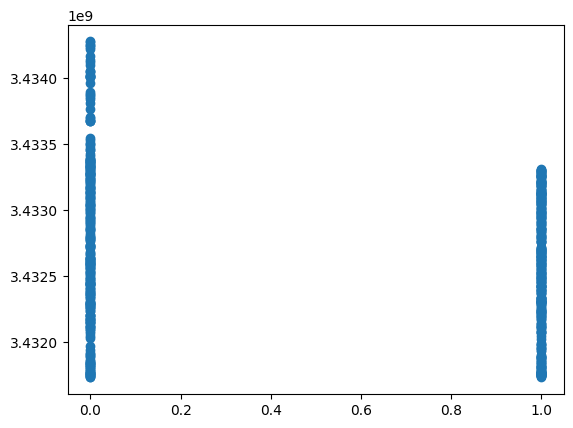

In [33]:
plt.scatter(df['Gender'], df['RespondentID'])

# Hypothesis Tests
##### Age - Electronics Use

In [84]:
import pandas as pd
import scipy.stats as stats

# P value list for later correction
p_values = []

# Load Data
df = pd.read_csv('coded.csv')
df = df[['Age', 'Have you ever used personal electronics during take off or landing in violation of a flight attendant\'s direction?']]
df = df.dropna()

contingency_table = pd.crosstab(df['Age'], df["Have you ever used personal electronics during take off or landing in violation of a flight attendant's direction?"])

# Performing the Chi-Squared test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
min_expected_frequency = expected.min()

# Outputting the results
print(f"Chi-Squared Value: {chi2}")
print(f"P-Value: {p}")
print(f"Degrees of Freedom: {dof}")
print(f"Minimum Expected Frequency (should be >5): {min_expected_frequency}")

# Interpreting the result
alpha = 0.05
if p < alpha:
    print("Result is significant - age appears to affect electronics use during takeoff/landing")
else:
    print("Result is not significant - no evidence that age affects electronics use during takeoff/landing")

p_values.append(p)


Chi-Squared Value: 48.69741738108625
P-Value: 1.5130095395312053e-10
Degrees of Freedom: 3
Minimum Expected Frequency (should be >5): 27.748517200474495
Result is significant - age appears to affect electronics use during takeoff/landing


##### Children - Finding it rude to bring children

In [85]:
# Load Data
df = pd.read_csv('coded.csv')
df = df[['Do you have any children under 18?', 'In general, is it rude to knowingly bring unruly children on a plane?']]
df = df.dropna()

contingency_table = pd.crosstab(df['Do you have any children under 18?'], df["In general, is it rude to knowingly bring unruly children on a plane?"])

# Performing the Chi-Squared test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
min_expected_frequency = expected.min()

# Outputting the results
print(f"Chi-Squared Value: {chi2}")
print(f"P-Value: {p}")
print(f"Degrees of Freedom: {dof}")
print(f"Minimum Expected Frequency (should be >5): {min_expected_frequency}")

# Interpreting the result
alpha = 0.05
if p < alpha:
    print("Result is significant - having children appears to affect opinion on unruly children on planes")
else:
    print("Result is not significant - no evidence that having children affects opinion on unruly children on planes")

p_values.append(p)

Chi-Squared Value: 41.174533193821205
P-Value: 1.1456810229179771e-09
Degrees of Freedom: 2
Minimum Expected Frequency (should be >5): 32.48284023668639
Result is significant - having children appears to affect opinion on unruly children on planes


##### Third hypothesis: Height and Seat Reclining Behavior

In [86]:
import pandas as pd
import scipy.stats as stats
def do_anova(var1, var2):
    # Load Data
    df = pd.read_csv('coded.csv')
    df = df[[var1, var2]]
    df = df.dropna()

    # Create a list of groups from the unique values in var2
    groups = [df[df[var2] == val][var1] for val in sorted(df[var2].unique())]

    # Perform ANOVA
    anova_result = stats.f_oneway(*groups)

    print(f"\033[4mAnova for ({var1}) and ({var2}):\033[0m")
    print(f"ANOVA F-value: {anova_result.statistic}")
    print(f"P-value: {anova_result.pvalue}")

    p_values.append(anova_result.pvalue)

    # Calculate and print mean height for each category of seat reclining frequency
    mean_heights = df.groupby(var2)[var1].mean()
    print("\nMean height for each category:")
    print(mean_heights)
    print("--------------------------------------------------------------------------------\n")

do_anova('How tall are you?', 'Is itrude to recline your seat on a plane?')
do_anova('How tall are you?', "Given the opportunity, would you eliminate the possibility of reclining seats on planes entirely?")

Anova for (How tall are you?) and (Is itrude to recline your seat on a plane?):
ANOVA F-value: 1.640506612615218
P-value: 0.1944943339384304

Mean height for each category:
Is itrude to recline your seat on a plane?
0.0    171.199801
1.0    171.174021
2.0    173.436620
Name: How tall are you?, dtype: float64
--------------------------------------------------------------------------------

Anova for (How tall are you?) and (Given the opportunity, would you eliminate the possibility of reclining seats on planes entirely?):
ANOVA F-value: 5.68940092093046
P-value: 0.017285378309640102

Mean height for each category:
Given the opportunity, would you eliminate the possibility of reclining seats on planes entirely?
0.0    170.839496
1.0    172.612741
Name: How tall are you?, dtype: float64
--------------------------------------------------------------------------------



There is also no relationship between how rude it is and whether the person has any obligation, but they would elimante them fully :)

##### Holm-Bonferroni Correction
instead of $\frac{a}N$ we do $\frac{a}{N-i+1}$ where $i$ is the rank of the specific test

no independence assumption

In [87]:
n_tests = len(p_values)
sorted_indices = sorted(range(n_tests), key=lambda i: p_values[i])
corrected_p_values = [None] * n_tests

for rank, i in enumerate(sorted_indices):
    corrected_p = p_values[i] * (n_tests - rank)
    corrected_p_values[i] = min(corrected_p, 1) # Corrected p-values should not exceed 1

# Print original and corrected p-values
for i, (p, corrected_p) in enumerate(zip(p_values, corrected_p_values)):
    print(f"Test {i+1}: Original P-value = {p}, Corrected P-value = {corrected_p}")

# Compare corrected p-values with alpha
alpha = 0.05
for i, corrected_p in enumerate(corrected_p_values):
    if corrected_p <= alpha:
        print(f"Test {i+1} is significant after Holm-Bonferroni correction.")
    else:
        print(f"Test {i+1} is not significant after Holm-Bonferroni correction.")

Test 1: Original P-value = 1.5130095395312053e-10, Corrected P-value = 6.052038158124821e-10
Test 2: Original P-value = 1.1456810229179771e-09, Corrected P-value = 3.4370430687539316e-09
Test 3: Original P-value = 0.1944943339384304, Corrected P-value = 0.1944943339384304
Test 4: Original P-value = 0.017285378309640102, Corrected P-value = 0.034570756619280205
Test 1 is significant after Holm-Bonferroni correction.
Test 2 is significant after Holm-Bonferroni correction.
Test 3 is not significant after Holm-Bonferroni correction.
Test 4 is significant after Holm-Bonferroni correction.
